C:\Users\asus\AppData\Local\Temp\ipykernel_6244\3343884208.py:13: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


jumlah titik terdeteksi =  1000


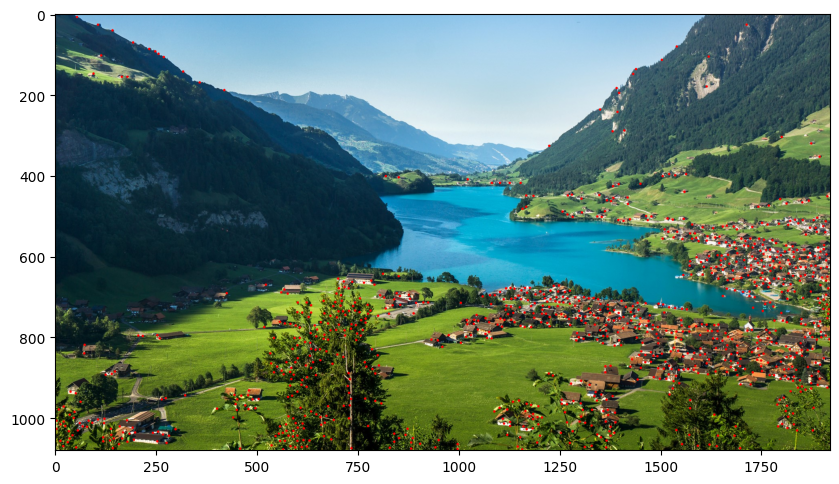

(<matplotlib.image.AxesImage at 0x205bc8e6a70>, None)

In [18]:
# Latihan 4. Menggunakan Corner Detector
# Menggunakan Shi-Tomasi GFTT untuk deteksi ujung (corner detection)
import numpy as np
import cv2
from matplotlib import pyplot as plt

# gunakan gambar
img = cv2.imread('swiss.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# deteksi pojok dengan GFTT
corners = cv2.goodFeaturesToTrack(gray,1000,0.01,10)
corners = np.int0(corners)

# menampilkan jumlah titik terdeteksi dengan fungsi numpy (np.ndarray.shape)
print("jumlah titik terdeteksi = ", corners.shape[0])

# untuk ditampilkan di Matplotlib, urutan band dibalik
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (10,10)

# untuk tiap pojok yang terdeteksi, munculkan pada gambar
for i in corners:
    x,y = i.ravel()
    cv2.circle(rgb,(x,y),3,255,-1)
plt.imshow(rgb),plt.show()

Jumlah titik terdeteksi: 181727


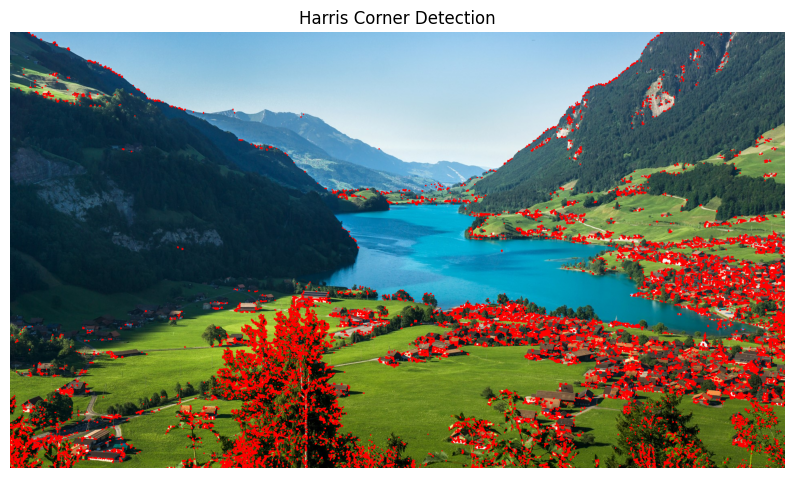

In [19]:
# Metode Harris Corner
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Gunakan gambar
img = cv2.imread('swiss.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi pojok dengan metode Harris Corner Detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

# Ambil pojok-pojok yang cukup tajam (nilai dst melebihi ambang batas)
threshold = 0.01 * dst.max()
corner_img = np.copy(img)
corner_img[dst > threshold] = [0, 0, 255]  # Gambar titik-titik pojok berwarna merah

# Tampilkan jumlah titik pojok yang terdeteksi
corners = np.argwhere(dst > threshold)
num_corners = len(corners)
print("Jumlah titik terdeteksi:", num_corners)

# Tampilkan gambar dengan titik-titik pojok yang terdeteksi
plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis('off')
plt.show()
